# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [1]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [4]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labelled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [5]:
df = pd.read_csv(data_dir+'raw/raw_v1.txt', sep='\t', encoding='utf-8')
df.columns

Index(['text', 'text_b', 'text_a', 'entity', 'entity_type', 'task', 'label',
       'tag', 'comment'],
      dtype='object')

In [6]:
df.head()

,text,text_b,text_a,entity,entity_type,task,label,tag,comment
0,11/01/2019 13: 46 037413006927 DR SCHUBEL & KO...,11/01/2019 13: 46 037413006927 DR SCHUBEL & KO...,Dr. Schubel & Kollegen Rechtsanwalte und Facha...,01/ 01,DateTime,gp,None,NaN,NaN
1,11/01/2019 13: 46 037413006927 DR SCHUBEL & KO...,0220 0816 81 BIC: BYLADEM)HOF Commerzbank Plav...,Treuhandkonto) I.BAN: DE84 8704 0000 0 493 505...,11.01.2019,DateTime,gp,NaN,NaN,NaN
2,INGENIEURBURO NEUNKIRCHEN + PARTNER 0 075853 S...,RECHNUNG 1GP3190024 Haftpflicht 07.01.2019 Haf...,Schadendatum: Versicherungsnehmer: Amtl. Kennz...,03.01.2019,DateTime,gp,None,NaN,NaN
3,11/01/2019 13: 46 037413006927 DR SCHUBEL & KO...,um Bejahung Ihrer Einstandspflicht sowie sofor...,. Unsere Mandantschaft mochte nun nicht mehr z...,25.01.2019,DateTime,gp,NaN,NaN,NaN
4,11/01/2019 13:58 0821-907692029 RAE FABER&FABE...,FAMILIENRECHT FACHANWALTIN FOR ERBRECHT SARAH ...,02-su STEFANIE HOLME DIPL.-JUR. (UNIV.) Bitte ...,1.01.2019,DateTime,gp,NaN,NaN,NaN


## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

In [7]:
%%time

ul = main.Main('tal')

[INFO] Iteration # 0
[INFO] Input Length -> 7766
[INFO] Label Counts: 
gracePeriodDate    47
None               28
damageDate         19
documentDate        7
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)

[INFO] Estimating complexity:
	[INFO] Data available for training -> 74


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.60      0.75      0.67         4
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.48      0.52      0.49        13
weighted avg       0.62      0.69      0.65        13

	[INFO] Complexity Score -> 0.6923076923076923

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/ul_label/tal/input-it_0-split_1.xlsx
None               103
gracePeriodDate     35
documentDate        26
damageDate          23
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_label/tal/input-it_0-split_2.xlsx
None               104
gracePeriodDate     34
documentDate        27
damageDate          19
Name: pred, dtype: 

[INFO] Iteration # 1
[INFO] Loading splits from iteration 0.
[INFO] Input Length -> 5342
[INFO] Label Counts: 
None               231
gracePeriodDate     98
documentDate        58
damageDate          58
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)

[INFO] Estimating complexity:
	[INFO] Data available for training -> 75
	[INFO] Found an empty row during text cleaning.


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.50      0.60      0.55         5
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64        14
   macro avg       0.55      0.48      0.47        14
weighted avg       0.65      0.64      0.60        14

	[INFO] Complexity Score -> 0.6428571428571429

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/ul_label/tal/input-it_1-split_1.xlsx
None               129
gracePeriodDate     48
documentDate        35
damageDate          31
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_label/tal/input-it_1-split_2.xlsx
None               134
gracePeriodDate     39
damageDate          37
documentDate        32
Name: pred, dtype: 

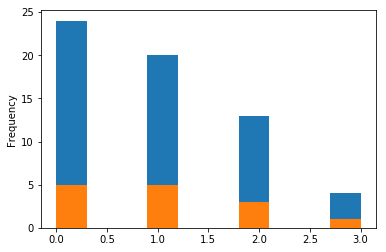

In [8]:
%%time

ul = main.Main('tal', debug_iter_id=1)

In [10]:
%%time

ul = main.Main('tal', debug_iter_id=2)

[INFO] Iteration # 2
[INFO] Loading splits from iteration 1.
[INFO] Input Length -> 5457
[INFO] Label Counts: 
gracePeriodDate    38
None               32
damageDate         21
documentDate        8
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Clustering needed for split.


UnboundLocalError: local variable 'data_tagged' referenced before assignment

## Estimate Complexity

1. Rule based: minimume requirement per category
2. Spread: Oversampling (SMOTE) or Undersampling?
3. Complexity: preprocessing + supervised (simple TFIDF?)
4. Complexity Score: performance * data quantity   
-- Higher = better

[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

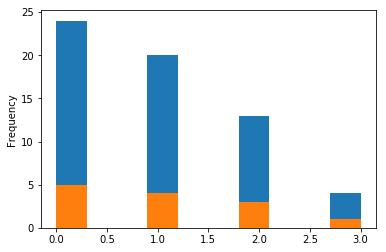

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

1. LDA / K-means

## Determine Split
Overlap

In [38]:
sp.calculate_split(3806, 0.73, 10)

(10, 0.27)

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  